<a href="https://colab.research.google.com/github/sauravkokane/Data-Science-Training/blob/master/Deep_learning_with_Python%2C_Tensorflow_and_Keras_Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# import required libraries
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf

tf.__version__

'2.17.1'

In [3]:
# connect drive to this notebook
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# load mnist dataset
mnist = tf.keras.datasets.mnist

In [41]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

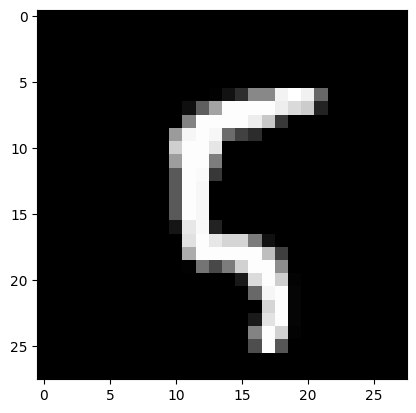

In [7]:
plt.imshow(x_train[100], cmap='gray')
plt.show()

In [8]:
print(x_train[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 25

In [42]:
# Normalize the data from x_train and x_test
x_train = tf.keras.utils.normalize(x_train, axis=1)
x_test = tf.keras.utils.normalize(x_test, axis=1)

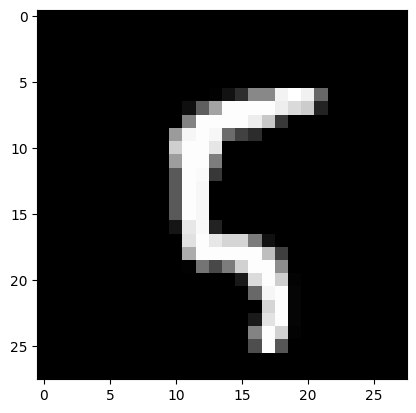

In [9]:
plt.imshow(x_train[100], cmap='gray')
plt.show()

In [10]:
print(x_train[100])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   2  18  46 136 136
  244 255 241 103   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  15  94 163 253 253 253 253
  238 218 204  35   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 131 253 253 253 25

In [43]:
# Import sequential model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten

In [44]:
model = Sequential()
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(128, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [45]:
# Train the model
model.fit(x_train, y_train, epochs=3)

Epoch 1/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.8632 - loss: 0.4737
Epoch 2/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9657 - loss: 0.1122
Epoch 3/3
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9776 - loss: 0.0738


In [46]:
# Test loss and accuracy of model
val_loss, val_acc = model.evaluate(x_test, y_test)
print(val_loss, val_acc)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9664 - loss: 0.1025
0.09017626941204071 0.9710000157356262


In [47]:
model.save('/content/drive/MyDrive/ML_DL_Models/handwritten.keras')

In [48]:
new_model = tf.keras.models.load_model('/content/drive/MyDrive/ML_DL_Models/handwritten.keras')

In [49]:
predictions = new_model.predict([x_test])

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


In [50]:
x_test.shape

(10000, 28, 28)

In [51]:
x_test[0]

array([[0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        ],
       [0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.        , 0.        , 0.        , 0.        ,
        0.        , 0.    

In [52]:
x_train_100 = new_model.predict([x_train])

1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step


In [54]:
x_train_100_pred = new_model.predict(np.expand_dims(x_train[100], axis=0))

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


In [55]:
x_train_100_pred.argmax()

5

In [56]:
print(predictions)

[[3.9974948e-09 7.6306847e-08 7.3323659e-05 ... 9.9910092e-01
  3.0163454e-07 9.9689314e-06]
 [8.2317007e-09 1.9262882e-04 9.9980474e-01 ... 2.3127944e-11
  3.0281205e-07 1.1268684e-09]
 [1.9307154e-06 9.9952084e-01 1.8121149e-05 ... 1.5298201e-04
  2.1521172e-04 5.8834912e-06]
 ...
 [2.9261975e-09 1.1962255e-06 4.8365191e-08 ... 8.5160387e-04
  5.8491895e-07 3.2757473e-04]
 [6.4532751e-06 8.6655555e-06 2.7056037e-06 ... 4.0618732e-04
  1.2755113e-03 3.5988703e-07]
 [3.9172537e-07 6.6050980e-08 8.0560512e-06 ... 1.2412682e-10
  5.3011334e-08 7.0980142e-09]]


In [57]:
predictions[0]

array([3.9974948e-09, 7.6306847e-08, 7.3323659e-05, 8.1426505e-04,
       9.2800073e-11, 1.0604441e-06, 8.0110836e-16, 9.9910092e-01,
       3.0163454e-07, 9.9689314e-06], dtype=float32)

In [58]:
np.argmax(predictions[0])

7

In [59]:
outputs = []
for prediction in predictions:
  outputs.append(np.argmax(prediction))

In [ ]:
outputs[0], outputs[100]

(7, 6)

In [60]:
for i, (yi, output) in enumerate(zip(y_test, outputs)):
  if yi != output:
    print(i, yi, output)

62 9 8
115 4 9
151 9 8
217 6 5
247 4 2
259 6 0
320 9 8
321 2 7
340 5 3
391 8 2
406 5 9
425 4 2
445 6 0
448 9 8
495 8 2
582 8 2
610 4 6
613 2 8
619 1 8
684 7 3
691 8 7
717 0 6
720 5 8
740 4 9
760 4 9
844 8 7
866 5 8
947 8 9
982 3 2
1014 6 5
1039 7 2
1044 6 8
1112 4 6
1114 3 8
1147 4 7
1157 4 7
1173 7 9
1178 4 0
1181 6 1
1182 6 8
1194 7 9
1226 7 2
1232 9 4
1242 4 9
1247 9 3
1253 4 6
1290 3 5
1319 8 3
1378 5 6
1393 5 3
1414 9 7
1466 5 3
1500 7 1
1522 7 9
1527 1 5
1530 8 7
1549 4 6
1553 9 3
1609 2 6
1611 3 5
1670 5 3
1681 3 7
1721 7 9
1751 4 2
1754 7 2
1790 2 7
1878 8 3
1901 9 4
1941 7 2
1952 9 8
1982 6 5
1984 2 0
1987 0 9
2018 1 7
2052 8 4
2093 8 1
2098 2 0
2109 3 7
2118 6 0
2129 9 8
2130 4 9
2135 6 1
2145 4 2
2162 5 8
2174 3 5
2182 1 2
2272 8 0
2293 9 0
2369 5 9
2371 4 9
2387 9 1
2406 9 1
2414 9 4
2422 6 7
2433 2 1
2454 6 8
2514 4 9
2526 5 3
2607 7 1
2618 3 5
2648 9 0
2654 6 1
2705 1 8
2720 9 4
2743 5 8
2760 9 4
2770 3 7
2810 5 3
2896 8 0
2915 7 3
2921 3 2
2927 3 2
2939 9 7
2945 3 9
2953

Actual: 3
Predicted: 3


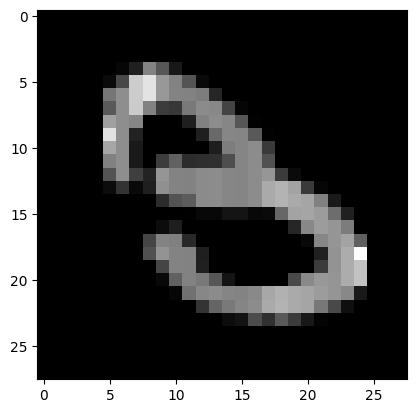

In [61]:
plt.imshow(x_test[18], cmap="grey")
print(f"Actual: {y_test[18]}")
print(f"Predicted: {outputs[18]}")

Actual: 6
Predicted: 6


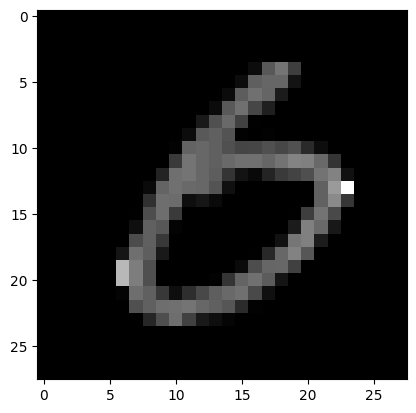

In [62]:
plt.imshow(x_test[965], cmap="grey")
print(f"Actual: {y_test[965]}")
print(f"Predicted: {outputs[965]}")

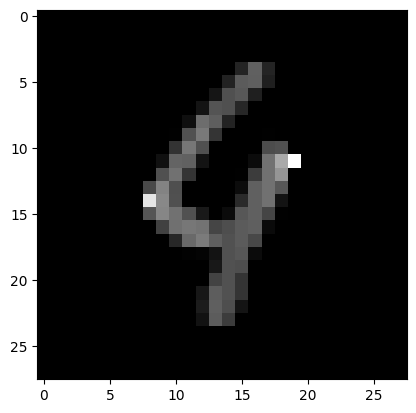

Actual: 4
Predicted: 9


In [64]:
plt.imshow(x_test[115], cmap="grey")
plt.show()
print(f"Actual: {y_test[115]}")
print(f"Predicted: {outputs[115]}")

Actual: 9
Predicted: 8


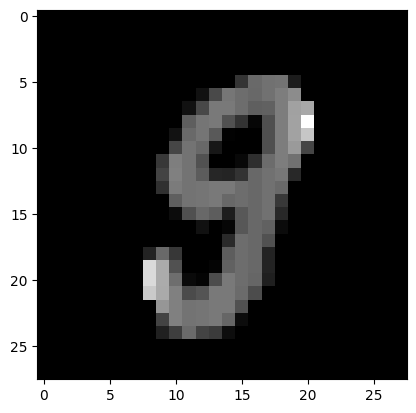

In [65]:
plt.imshow(x_test[448], cmap="grey")
print(f"Actual: {y_test[448]}")
print(f"Predicted: {outputs[448]}")